In [ ]:
#default_exp peakmaps 

# Peak slice maps (working on it)

> Slicing the cube  

In [ ]:
#hide 
%load_ext autoreload
%autoreload 2 
%matplotlib notebook

In [ ]:
# hide 
import os 
os.chdir('/home/frank/Work/Projecten/DoRe/viz/raw_nmf')

In [ ]:
#hide 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib notebook

In [ ]:
import skimage.exposure as ske

In [ ]:
from maxrf4u import DataStack, HotmaxAtlas, get_hotslices, get_peakmaps, multi_plot, plot_peakslices, plot_ptrn  

ds = DataStack('RP-T-1898-A-3689.datastack') 

x_keVs = ds.read('maxrf_energies')
y_max = ds.read('maxrf_maxspectrum') 
cube = ds.read('maxrf_cube', compute=False) # don't load into memory yet (too big) 
imvis_reg_highres = ds.read('imvis_reg_highres') 
imvis_reg = ds.read('imvis_reg') 
imvis_extent = ds.read('imvis_extent')

hma = HotmaxAtlas('RP-T-1898-A-3689.datastack')

## How about Calcium?

In [ ]:
n = 5

x_keVs = hma.x_keVs
y_hot = hma.hotmax_spectra[n]
peak_idxs = hma.peak_idxs_list[n] 
hot_pixel =hma.hotmax_pixels[n]

slices = get_hotslices("RP-T-1898-A-3689.datastack", n, clip_level=0.02)

<IPython.core.display.Javascript object>


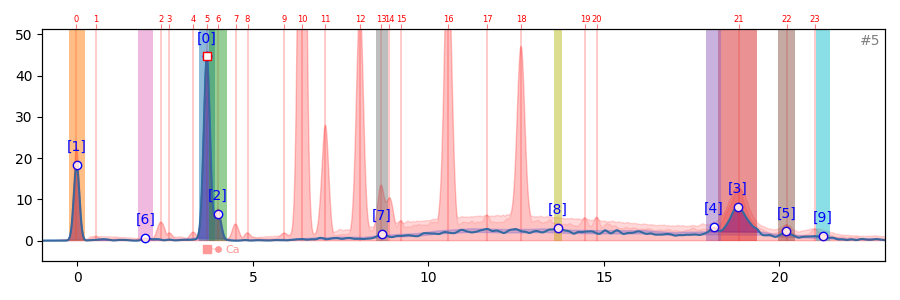

In [ ]:
ax, labels = hma.plot_spectrum(n) 
plot_peakslices(x_keVs, slices, ax=ax);
ymin, ymax = ax.get_ylim()
ax.set_ylim(-5, ymax)
plot_ptrn('Ca', -2, ax);

In [ ]:
peak_maps, keV_maps = get_peakmaps(slices, 'RP-T-1898-A-3689.datastack', verbose=True)

slices and super slices:
0: [442 465 488] [442 522]
1: [ 73  96 119] [ 73 119]
2: [472 497 522] [442 522]
3: [1918 1973 2028] [1884 2028]
4: [1884 1905 1926] [1884 2028]
5: [2087 2111 2135] [2087 2135]
6: [270 291 312] [270 312]
7: [945 963 981] [945 981]
8: [1450 1462 1474] [1450 1474]
9: [2194 2215 2236] [2194 2236]
superedge_idxs 16: [73, 119, 270, 312, 442, 522, 945, 981, 1450, 1474, 1884, 2028, 2087, 2135, 2194, 2236]
Computing 16 super slice edges for all baseline corrections...
[########################################] | 100% Completed | 32.5s
Computing slice 0/9
[########################################] | 100% Completed |  3.8s
Computing slice 1/9
[########################################] | 100% Completed |  3.7s
Computing slice 2/9
[########################################] | 100% Completed |  8.2s
Computing slice 3/9
[########################################] | 100% Completed |  5.3s
Computing slice 4/9
[########################################] | 100% Completed |  5.0s
Co

<IPython.core.display.Javascript object>


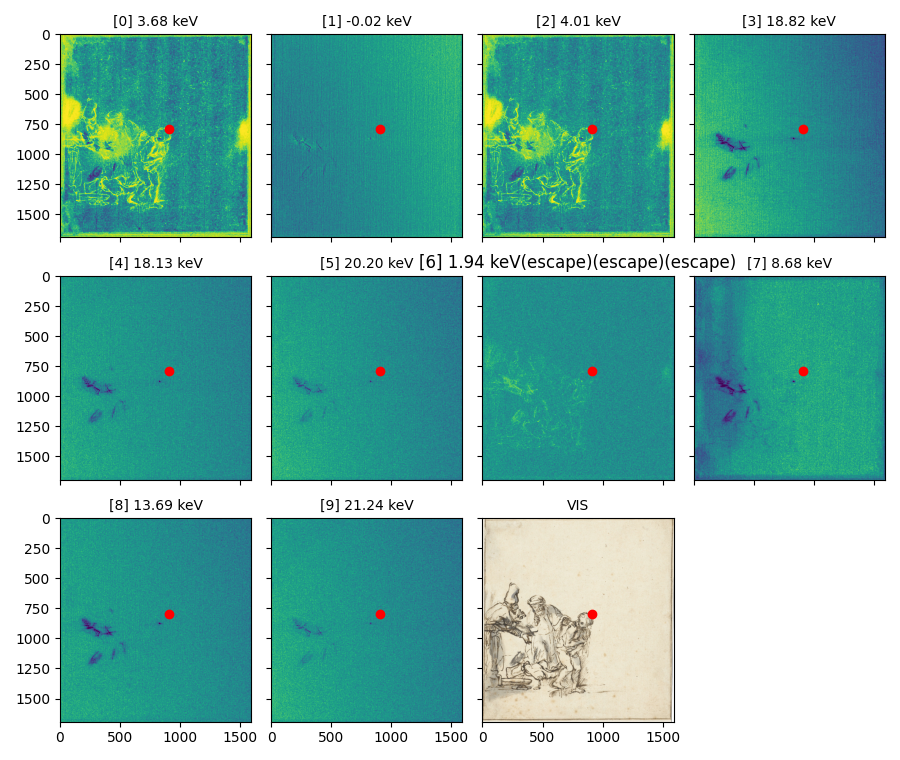

In [ ]:
titles = [f'[{i}] {x_keVs[peak_idxs[i]]:0.2f} keV' for i in range(len(slices))]
titles.append('VIS')

peak_maps_histeq = [ske.equalize_hist(pm) for pm in peak_maps]

fig, axs = multi_plot(*peak_maps_histeq, imvis_reg, titles=titles, hot_pixel=hot_pixel)

Let's check if peak #5[6]  is an escape peak for Ca_Ka by calculating the energy shift.... 

In [ ]:
peak_idxs = hma.peak_idxs_list[5]

x_keVs[peak_idxs[0]] - x_keVs[peak_idxs[6]]

1.7459311050874269

**Indeed!!**

In [ ]:
title = axs.flatten()[6].get_title() + '(escape)'
axs.flatten()[6].set_title(title);

There is much more to be learned from this overview, but before going into this let's look at other elements. 

## How about Manganese? 

Let's create a similar peak map overview for the hotmax spectrum corresponding to Fe_Ka. This is hotmax spectrum #10. Also of interest are the related hotmax spectra for manganese #9 and for Fe_Kb #11. 

In [ ]:
n = 9 # Mn

x_keVs = hma.x_keVs
y_hot = hma.hotmax_spectra[n]
peak_idxs = hma.peak_idxs_list[n] 
hot_pixel =hma.hotmax_pixels[n]

slices = get_hotslices("RP-T-1898-A-3689.datastack", n, clip_level=0.02)

In [ ]:
peak_maps, keV_maps = get_peakmaps(slices, 'RP-T-1898-A-3689.datastack')

[########################################] | 100% Completed | 43.5s
Computing slice 0/10
[########################################] | 100% Completed |  5.6s
Computing slice 1/10
[########################################] | 100% Completed |  5.2s
Computing slice 2/10
[########################################] | 100% Completed | 11.6s
Computing slice 3/10
[########################################] | 100% Completed |  6.4s
Computing slice 4/10
[########################################] | 100% Completed |  5.8s
Computing slice 5/10
[########################################] | 100% Completed |  5.7s
Computing slice 6/10
[########################################] | 100% Completed |  6.1s
Computing slice 7/10
[########################################] | 100% Completed |  6.1s
Computing slice 8/10
[########################################] | 100% Completed |  6.4s
Computing slice 9/10
[########################################] | 100% Completed |  5.8s
Computing slice 10/10
[###################

<IPython.core.display.Javascript object>


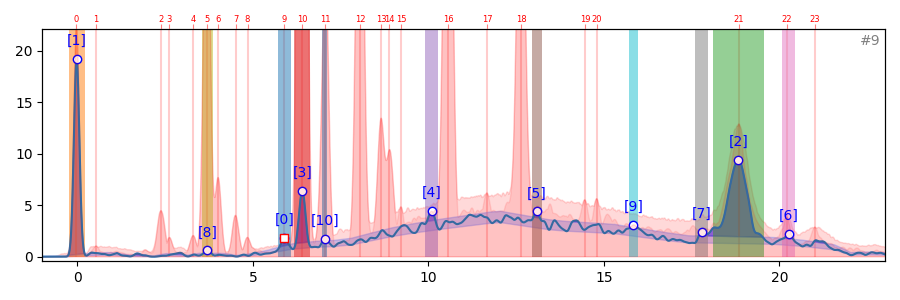

In [ ]:
ax, labels = hma.plot_spectrum(n) 
plot_peakslices(x_keVs, slices, ax=ax);

<IPython.core.display.Javascript object>


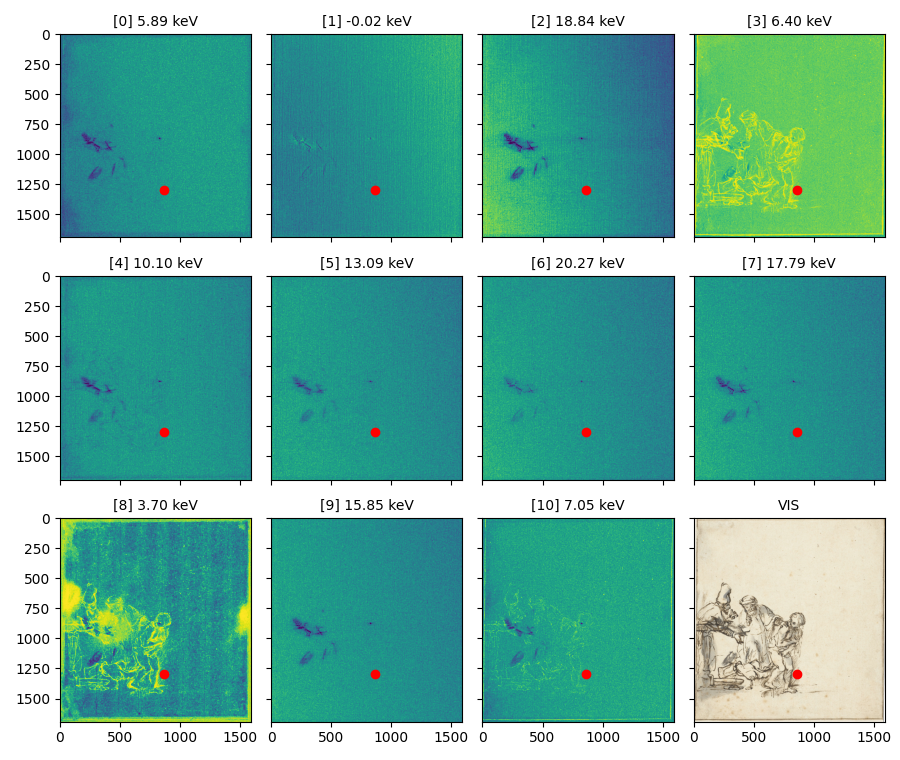

In [ ]:
titles = [f'[{i}] {x_keVs[peak_idxs[i]]:0.2f} keV' for i in range(len(slices))]
titles.append('VIS')

peak_maps_histeq = [ske.equalize_hist(pm) for pm in peak_maps]

multi_plot(*peak_maps_histeq, imvis_reg, titles=titles, hot_pixel=hot_pixel);

Mm, these histogram equalized peak maps aren't very informative. Most of the slices are just noise. I can not be sure how manganese and iron are correlated. Need to plot that in a different way. 

In [ ]:
FeKa_map = peak_maps[3]
MnKa_map = peak_maps[0]

<IPython.core.display.Javascript object>


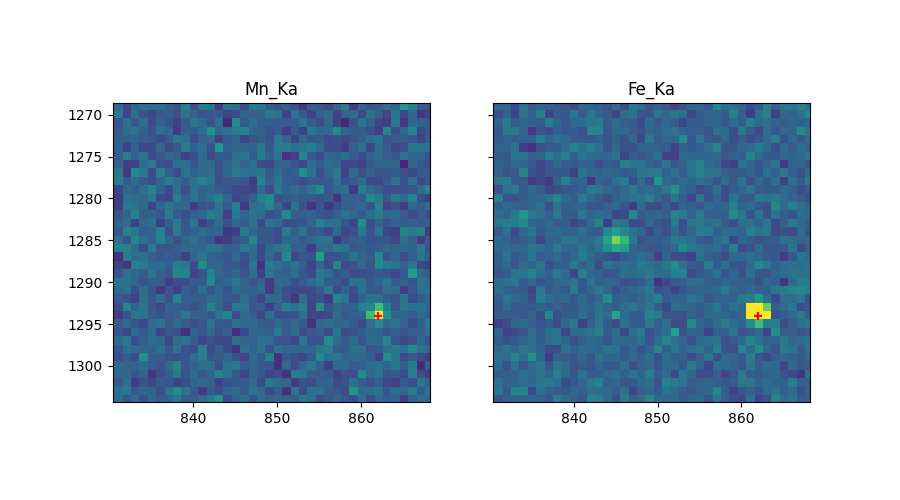

In [ ]:
fig, [ax, ax1] = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=[9, 5])

ax.imshow(MnKa_map)
ax.set_title('Mn_Ka')

y, x, z = hot_pixel
ax.scatter([x], [y], c='r', marker='+')
ax1.imshow(FeKa_map, vmax=2)
ax1.set_title('Fe_Ka')
ax1.scatter([x], [y], c='r', marker='+');

My first question is, are there any other manganese speckles? And second, do the correlate with iron speckles, as I would expect? 

**This question needs to wait. Need speckle segmentation functions.**

## How about Iron?

In [ ]:
n = 10 # Fe_Ka

x_keVs = hma.x_keVs
y_hot = hma.hotmax_spectra[n]
peak_idxs = hma.peak_idxs_list[n] 
hot_pixel =hma.hotmax_pixels[n]

slices = get_hotslices("RP-T-1898-A-3689.datastack", n, clip_level=0.02)

In [ ]:
peak_maps, keV_maps = get_peakmaps(slices, 'RP-T-1898-A-3689.datastack')

[########################################] | 100% Completed | 29.6s
Computing slice 0/6
[########################################] | 100% Completed |  4.2s
Computing slice 1/6
[########################################] | 100% Completed |  3.2s
Computing slice 2/6
[########################################] | 100% Completed |  5.3s
Computing slice 3/6
[########################################] | 100% Completed |  6.0s
Computing slice 4/6
[########################################] | 100% Completed |  5.6s
Computing slice 5/6
[########################################] | 100% Completed |  6.1s
Computing slice 6/6
[########################################] | 100% Completed |  5.3s


<IPython.core.display.Javascript object>


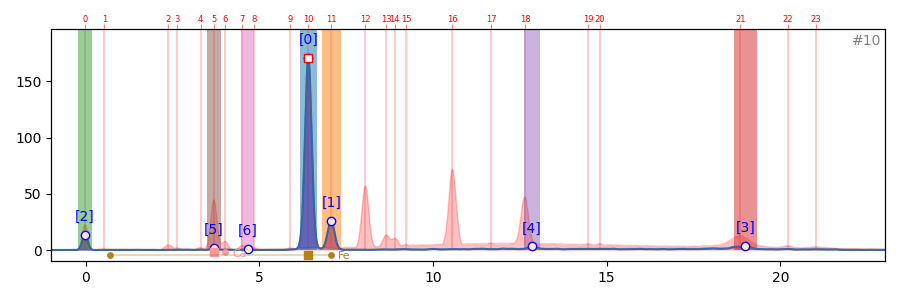

In [ ]:
ax, labels = hma.plot_spectrum(n) 
plot_peakslices(x_keVs, slices, ax=ax);
ax.set_ylim(-10, 1.15*y_hot.max())
plot_ptrn('Fe', -2, ax);
plot_ptrn('Ca', -1, ax);

<IPython.core.display.Javascript object>


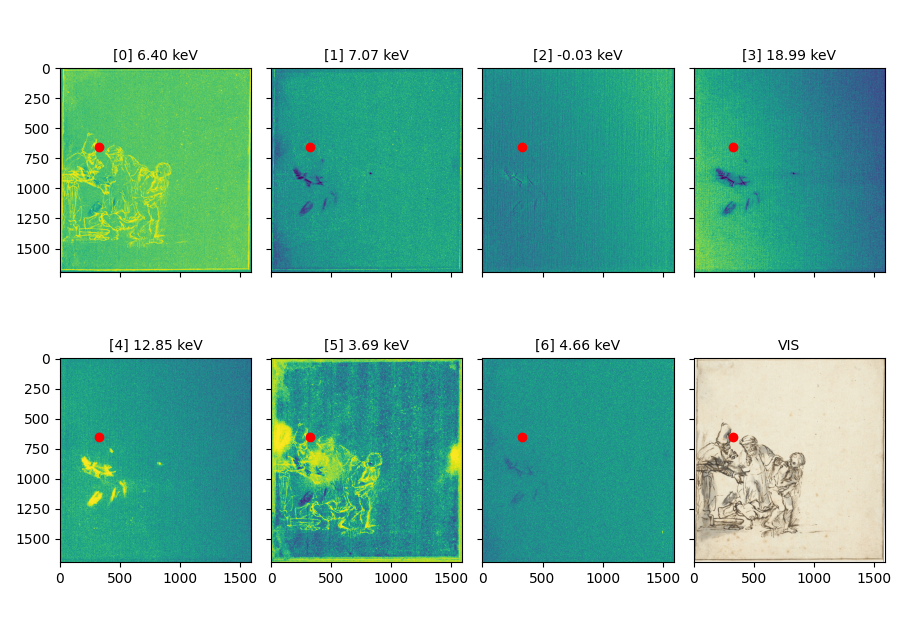

In [ ]:
titles = [f'[{i}] {x_keVs[peak_idxs[i]]:0.2f} keV' for i in range(len(slices))]
titles.append('VIS')

peak_maps_histeq = [ske.equalize_hist(pm) for pm in peak_maps]

multi_plot(*peak_maps_histeq, imvis_reg, titles=titles, hot_pixel=hot_pixel);

In [ ]:
peak_idxs = hma.peak_idxs_list[10]

x_keVs[peak_idxs[0]] - x_keVs[peak_idxs[6]]

1.7459311050874273

Again we see an escape peak for Fe_Ka. 

## How about Chlorine? 

In [ ]:
n = 3

x_keVs = hma.x_keVs
y_hot = hma.hotmax_spectra[n]
peak_idxs = hma.peak_idxs_list[n] 
hot_pixel =hma.hotmax_pixels[n]

slices = get_hotslices("RP-T-1898-A-3689.datastack", n, clip_level=0.02)

In [ ]:
peak_maps, keV_maps = get_peakmaps(slices, 'RP-T-1898-A-3689.datastack')

[########################################] | 100% Completed | 27.0s
Computing slice 0/10
[########################################] | 100% Completed |  3.2s
Computing slice 1/10
[########################################] | 100% Completed |  4.9s
Computing slice 2/10
[########################################] | 100% Completed | 12.3s
Computing slice 3/10
[########################################] | 100% Completed |  6.8s
Computing slice 4/10
[########################################] | 100% Completed |  6.2s
Computing slice 5/10
[########################################] | 100% Completed |  6.4s
Computing slice 6/10
[########################################] | 100% Completed |  6.6s
Computing slice 7/10
[########################################] | 100% Completed |  9.0s
Computing slice 8/10
[########################################] | 100% Completed |  3.0s
Computing slice 9/10
[########################################] | 100% Completed |  6.1s
Computing slice 10/10
[###################

We need to make sure we do not confuse Cl_Ka with a Rhodium L peak.

<IPython.core.display.Javascript object>


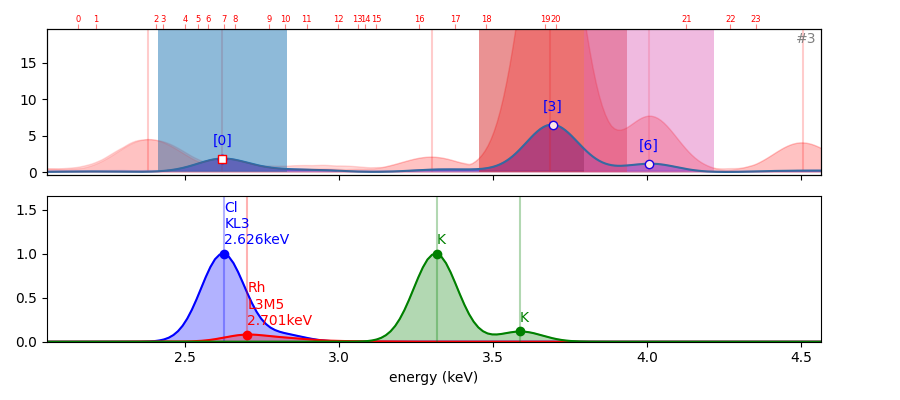

In [ ]:
import moseley as mos 
fig, [ax, ax1] = plt.subplots(nrows=2, sharex=True, figsize=[9, 4])
hma.plot_spectrum(n, ax=ax) 
plot_peakslices(x_keVs, slices, ax=ax);

ax1.set_ylim([0, 1.7])

mos.XFluo('Cl', tube_keV=30).plot(ax=ax1, color='b', peak_labels='full')
mos.XFluo('Rh', tube_keV=30).plot(ax=ax1, color='r', peak_labels='full')
mos.XFluo('K', tube_keV=30).plot(ax=ax1, color='g', peak_labels='simple')

This is not the case. 

In [ ]:
titles = [f'[{i}] {x_keVs[peak_idxs[i]]:0.2f} keV' for i in range(len(slices))]
titles.append('VIS')

<IPython.core.display.Javascript object>


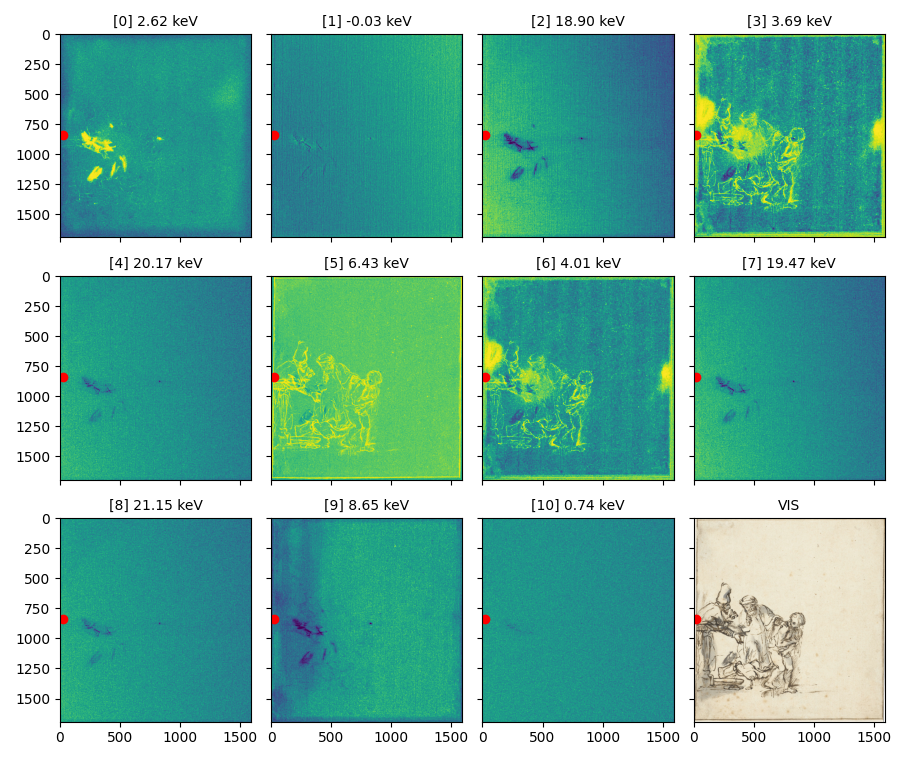

In [ ]:
peak_maps_histeq = [ske.equalize_hist(pm) for pm in peak_maps]

multi_plot(*peak_maps_histeq, imvis_reg, titles=titles, hot_pixel=hot_pixel);

Seems to be a *single grain of salt*? 

## How about Lead and Sulphur? 

**Run into error for n=16**

In [ ]:
n = 18 # Pb 

x_keVs = hma.x_keVs
y_hot = hma.hotmax_spectra[n]
peak_idxs = hma.peak_idxs_list[n] 
hot_pixel =hma.hotmax_pixels[n]

slices = get_hotslices("RP-T-1898-A-3689.datastack", n, clip_level=0.02)

In [ ]:
peak_maps, keV_maps = get_peakmaps(slices, 'RP-T-1898-A-3689.datastack')

Computing slice 0/7
[########################################] | 100% Completed |  5.8s
Computing slice 1/7
[########################################] | 100% Completed |  3.5s
Computing slice 2/7
[########################################] | 100% Completed |  5.4s
Computing slice 3/7
[########################################] | 100% Completed |  5.9s
Computing slice 4/7
[########################################] | 100% Completed |  6.5s
Computing slice 5/7
[########################################] | 100% Completed | 10.0s
Computing slice 6/7
[########################################] | 100% Completed |  6.1s
Computing slice 7/7
[########################################] | 100% Completed |  6.2s


<IPython.core.display.Javascript object>


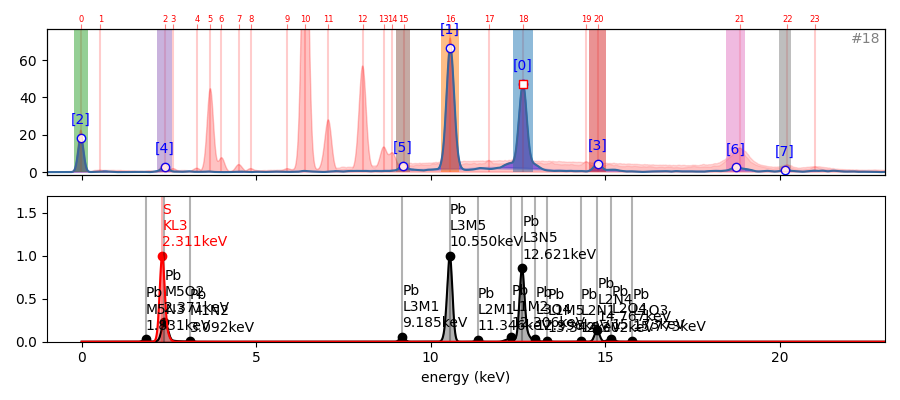

In [ ]:
import moseley as mos 
fig, [ax, ax1] = plt.subplots(nrows=2, sharex=True, figsize=[9, 4])
hma.plot_spectrum(n, ax=ax) 
plot_peakslices(x_keVs, slices, ax=ax);

ax1.set_ylim([0, 1.7])

mos.XFluo('Pb', tube_keV=30).plot(ax=ax1, color='k', peak_labels='full')
mos.XFluo('S', tube_keV=30).plot(ax=ax1, color='r', peak_labels='full')

<IPython.core.display.Javascript object>


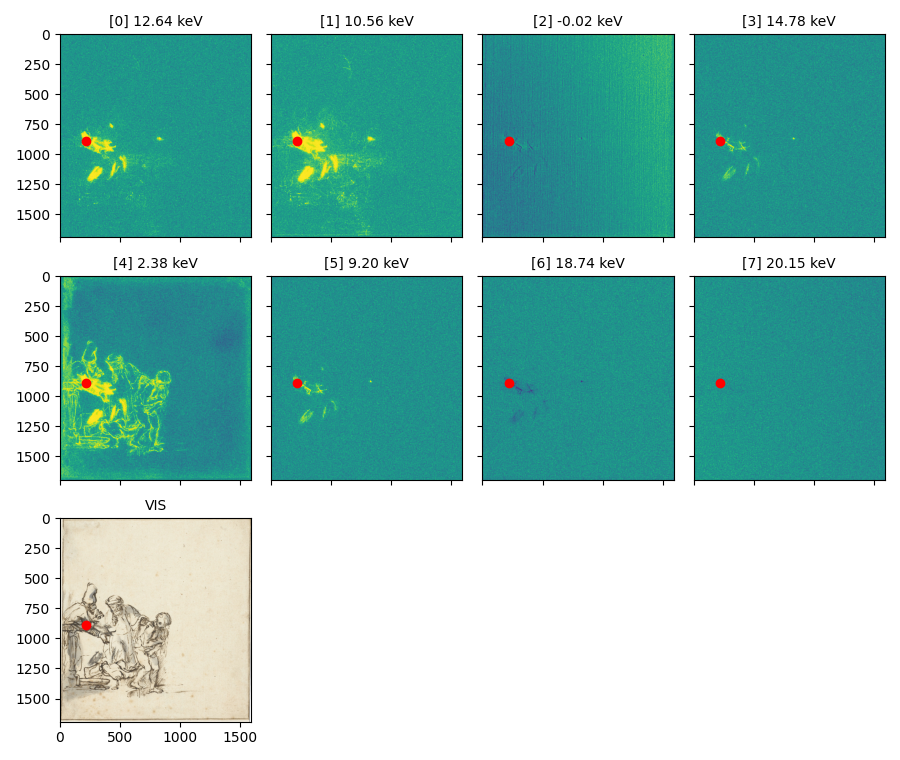

In [ ]:
titles = [f'[{i}] {x_keVs[peak_idxs[i]]:0.2f} keV' for i in range(len(slices))]
titles.append('VIS')

peak_maps_histeq = [ske.equalize_hist(pm) for pm in peak_maps]

multi_plot(*peak_maps_histeq, imvis_reg, titles=titles, hot_pixel=hot_pixel);

This is most interesting. Let's take a look at the keV map for the overlapping band of sulfur and lead. For sulfur this is the S_KL3 band at 2.311 keV. For lead this is the Pb_M5O2 band and 2.372 keV. 

The best map for sulfur without lead is actually the potassium map \#4

In [ ]:
mid_keV = (2.311 + 2.371) / 2

In [ ]:
SKa_keV_map = keV_maps[4]

<IPython.core.display.Javascript object>


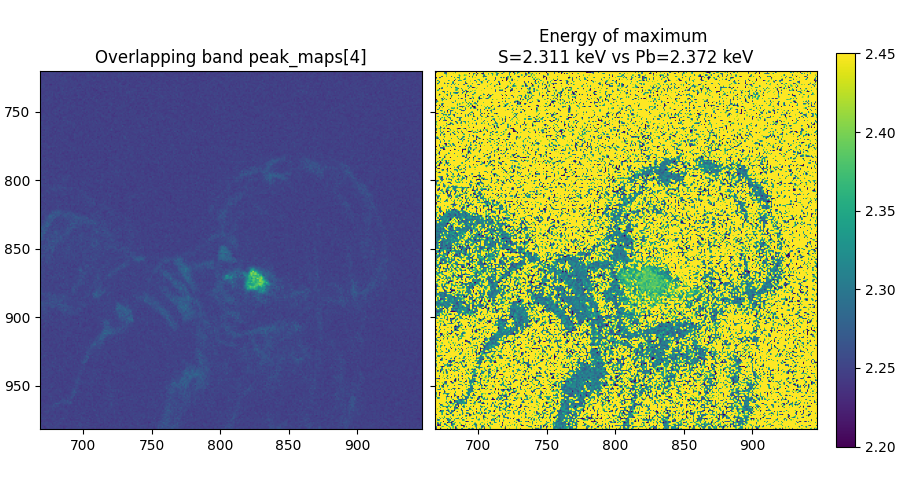

In [ ]:
fig, [ax, ax1] = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=[9, 5], constrained_layout=True)

ax.imshow(peak_maps[4])
ax.set_title('Overlapping band peak_maps[4]')
pos = ax1.imshow(SKa_keV_map, vmin=2.2, vmax=2.45)
fig.colorbar(pos, ax=ax1, shrink=0.8)
ax1.set_title('Energy of maximum \nS=2.311 keV vs Pb=2.372 keV');

Better use best lead free sulfur map in potassium (n=4)?  

## API

Ok, this is the new Gaussian code base. For now we do not return the fancy peak shape parameters to deconvolve overlapping bands. Soon this will be necessary. For now let's simply take a look at the peak maps... 

In [ ]:
#export 

import numpy as np 
import scipy.interpolate as sip
import scipy.signal as ssg 
from maxrf4u import DataStack, HotmaxAtlas 
from dask.diagnostics import ProgressBar 
import matplotlib.pyplot as plt 
import skimage.exposure as ske 
import skimage.morphology as skm 


def gaussian(x, x0, sigma): 
    '''Normal distribution around `x0` with standard deviation `sigma`.'''
    
    y = np.exp(-0.5 * ((x - x0) / sigma)**2)
    
    return y 


def fit_gaussian(x, y, peak_idx, rel_height=0.2, baseline=None): 
    '''Fit single gaussian distribution at `rel_height`. 
    
    Returns: `y_gauss`, `baseline`
    '''
    
    # just a single peak 
    [widths], [width_height], [left_ips], [right_ips] = ssg.peak_widths(y, [peak_idx], rel_height=rel_height)
    
    # create energy interpolation 
    keV_ipol = sip.interp1d(np.arange(len(x)), x)
     
    left_x = keV_ipol(left_ips)
    right_x = keV_ipol(right_ips)
    
    # pick smallest half width at rel_height 
    dx_left = left_x - x[peak_idx] 
    dx_right = right_x - x[peak_idx] 
    
    dx = sorted([dx_left, dx_right])[0] 
    
    # correct for baseline 
    if baseline is None:  
        baseline = np.zeros_like(y) 
        
    y_norm = (width_height - baseline[peak_idx]) / (y[peak_idx] - baseline[peak_idx]) 
        
    # calculate corresponding sigma 
    
    sigma = np.sqrt(-dx**2 / (2 * np.log(y_norm)))
    
    # calculate gaussian with baseline 
    
    y_gauss = (y[peak_idx] - baseline[peak_idx]) * gaussian(x, x[peak_idx], sigma) + baseline
    
    return y_gauss, baseline 
    
    

def plot_peakslices(x, slices, ax=None, y=None, labels=False): 
    '''Plot peak slice regions'''
    
    if ax is None: 
        fig, ax = plt.subplots(figsize=[8, 3]) 
        
    # plot spectrum if provided     
    if y is not None:      
        ax.plot(x, y) 
        ax.set_ylim([-2, 1.15 * y.max()])
        
    ylim = ax.get_ylim()[1] 
    
    ones = np.ones_like(x)
    
    for i, s in enumerate(slices): 
        
        is_in_slice = np.zeros_like(x).astype(bool)
        left_idx, mid_idx, right_idx = s 
        is_in_slice[left_idx:right_idx + 1] = True
        
        # left 
        # xi, yi = x_keVs[left_idx], y[left_idx]
        # ax.scatter(xi, yi, color='red', marker='|') 

        # right
        # xi, yi = x_keVs[right_idx], y[right_idx]
        # ax.scatter(xi, yi, color='green', marker='|') 
        
        # middle 
        # xi, yi = x_keVs[mid_idx], y[mid_idx]
        # ax.scatter(xi, yi, color='orange', marker='|') 
        
        ax.fill_between(x, ylim * ones,  where=is_in_slice, alpha=0.5, zorder=-10)
        
        if labels: 
            ax.annotate(f'[{i}]', [x[mid_idx], ylim], xytext=[0, -14], color='k', 
                    textcoords='offset points', ha='center')
        
        
    return ax 


def get_peakmaps(slices, datastack_file, norm=False, verbose=False): 
    '''Integrate peak `slices`  into peak maps and keV maps. 
    
    Returns: peak_maps, keV_maps'''
    
    ds = DataStack(datastack_file)
    x_keVs = ds.read('maxrf_energies')
    cube = ds.read('maxrf_cube', compute=False) # don't load into memory yet (too big)
    
    peak_maps = []
    keV_maps = []
    
    # preparing baseline correction (below) for all peak slices 
    # for clarity computing superedges separately (could be optimized)
    n_channels = len(x_keVs) 
    superslices = get_superslices(slices, n_channels) 
    
    if verbose:  
        print('slices and super slices:')
        for i, [s, ss] in enumerate(zip(slices, superslices)):
            print(f'{i}: {s} {ss}')
        
    superedges_dict = get_superedges_dict(cube, superslices, verbose=verbose)

    
    with ProgressBar(): 

        for i, [si, sj, sk] in enumerate(slices): 

            print(f'Computing slice {i}/{len(slices)-1}')#, end='\r')

            peak_slice = cube[:,:,si:sk+1].compute() 
            
            # original naive (single peak) baseline correction 
            # d = sk - si 
            # peak_map = np.sum(peak_slice, axis=2) / d - (peak_slice[:,:,0] + peak_slice[:,:,-1]) / 2 
            
            # New super slice baseline correction for overlapping peaks ;-)
            # avoids too much tilting 
            baseline = make_baseline(i, slices, superslices, superedges_dict)
            
            corrected_peak_slice = peak_slice - baseline 
            
            # average over slice layers 
            d = peak_slice.shape[-1]
            peak_map = np.sum(peak_slice, axis=2) / d 
            

            if norm:  
                peak_map = peak_map / peak_map.max()
                # no zero clipping to study better the low signal noise 
                # peak_map = np.clip(peak_map, a_min=0, a_max=1)

            keV_idx_map = si + np.argmax(peak_slice, axis=2)
            keV_map = x_keVs[keV_idx_map]

            peak_maps.append(peak_map) 
            keV_maps.append(keV_map)
        
    return peak_maps, keV_maps  


def multi_plot(*images, hot_pixel=None, titles=None, roi_list=None, axis_off=False, 
               sharex=True, sharey=True, vmin=None, vmax=None, cmap='viridis', 
               fontsize='medium', zoom_xyc=None, zoom_half_wh=[100, 100]): 
    '''Inspect multiple images simultaneously... 
    
    Fold along multiple rows if n > 4'''
    
    nrows_max = 4 
    n_img = len(images)
    
    nrows = (n_img // nrows_max) # completely filled rows 
    rest = n_img % nrows_max 
    if rest != 0:
        nrows = nrows + 1
    
    if n_img <= nrows_max: 
        ncols = n_img
    else: 
        ncols = nrows_max
        
    figsize = [9, 5 + 1.3 * (nrows -1)]
    
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, squeeze=False, sharex=sharex, sharey=sharey)
    
    for i, img in enumerate(images): 
    
        axs.flatten()[i].imshow(img, cmap=cmap, vmin=vmin, vmax=vmax)
        
        if hot_pixel is not None: 
            hot_yi, hot_xi, hot_zi = hot_pixel 
            axs.flatten()[i].scatter(hot_xi, hot_yi, color='r')
        
        if zoom_xyc is not None:
            xc, yc = zoom_xyc
            w_ha, h_ha = zoom_half_wh 

            axs.flatten()[i].set_xlim(xc - w_ha, xc + w_ha)
            axs.flatten()[i].set_ylim(yc + h_ha, yc - h_ha)
        
        if roi_list is not None: 
            add_roi_patches(axs.flatten()[i], roi_list)
            
    if titles is not None:
        for i, t in enumerate(titles): 
            axs.flatten()[i].set_title(t, fontsize=fontsize)
    
    # seems to have no effect: 
    for i in range(n_img, nrows * ncols): 
        axs.flatten()[i].axis('off')
    # therefore trying this: 
    if axis_off: 
        axs_flat = axs.flatten()
        for ax in axs_flat: 
            ax.set_axis_off()
        
    fig.subplots_adjust(hspace=0.1, wspace=0.1)    
            
    plt.tight_layout()
    
    return fig, axs 



def get_slices(x_keVs, y_hot, peak_idxs, rel_height=0.2, clip_level=0.05, baseline=None): 
    '''Based on single Gaussian peak fit for each peak slice. 
    
    Returns `peak_slices`''' 
    
    peak_slices = []
    
    for peak_idx in peak_idxs: 
    
        y_gauss, baseline = fit_gaussian(x_keVs, y_hot, peak_idx, rel_height=0.2, baseline=baseline)
        y_gauss_norm = (y_gauss - baseline) / (y_gauss - baseline).max()
        is_above_clip = y_gauss_norm > clip_level 
        indexes = np.argwhere(is_above_clip).flatten()
        left_mid_right = [indexes[0], peak_idx, indexes[-1]]
        
        peak_slices.append(left_mid_right)
        
    peak_slices = np.array(peak_slices)
    
    return peak_slices 


def get_hotslices(datastack_file, n, rel_height=0.2, clip_level=0.05): 
    '''Get slices for specifically for hotmax spectrum `n` in `datastack_file`.
    
    Using noiseline as peakbase. 

    
    Returns: `peak_slices`
    '''
    
    # populate required hotmax spectrum attributes 
    hma = HotmaxAtlas(datastack_file)
    
    x_keVs = hma.x_keVs
    y_hot = hma.hotmax_spectra[n]
    peak_idxs = hma.peak_idxs_list[n] 
    noiseline = hma.noiselines[n]
    
    slices = get_slices(x_keVs, y_hot, peak_idxs, rel_height=rel_height, clip_level=clip_level, baseline=noiseline) 
    
    return slices 



def get_superslices(slices, n_channels): 
    '''Returns for each slice the superslice edge indices. '''

    # create mask 
    is_slice = np.zeros(n_channels) #.astype(bool)
    
    for i, j, k in slices: 
        is_slice[i:k+1] = 1 

    # label areas (superslices) in mask 
    labeled = skm.label(is_slice)
    lmax = labeled.max()

    channel_idxs = np.arange(n_channels)

    superslices = []
    for i, j, k in slices: 
        for l in range(1, lmax+1): 
            super_idxs = channel_idxs[labeled==l]
            if j in super_idxs:  
                superslices.append([super_idxs.min(), super_idxs.max()])
                
    superslices = np.array(superslices)
                
    return superslices 


def get_superedges_dict(cube, superslices, verbose=False): 
    '''Compute super edges dict (only once).

    '''
    
    superedge_idxs = sorted(list(set(superslices.flatten()))) # make unique set 
    
    if verbose: 
        print(f'superedge_idxs {len(superedge_idxs)}: {superedge_idxs}')
        print(f'Computing {len(superedge_idxs)} super slice edges for all baseline corrections...')
    
    with ProgressBar(): 
        superedges = cube[:,:,superedge_idxs].compute()
        
    superedges = superedges.transpose([2, 0, 1])
    superedges_dict = {idx: edge for idx, edge in zip(superedge_idxs, superedges)}
    
    return superedges_dict 


def make_baseline(n, slices, superslices, superedges_dict):
    '''Create baseline correction for slice n. 
    
    Returns baseline slice 
    '''  

    i, j, k = slices[n]
    ss_i, ss_k = superslices[n]

    #print(f'{[i, j, k]} length={k-i}')
    #print(f'{[ss_i, ss_k]} length={ss_k-ss_i}')

    slope = (superedges_dict[ss_i] - superedges_dict[ss_k]) / (ss_k - ss_i)
    offset = superedges_dict[ss_i]

    super_n = ss_k - ss_i + 1 # super slice thickness layers 
    super_ramp =  np.arange(super_n) 
    slice_ramp = super_ramp[i-ss_i:super_n-(ss_k-k)] 

    baseline = offset[:,:,None] + slope[:,:,None] * slice_ramp 
    
    return baseline 


#hide 

# Issues 

#hide 

## Value error in gaussian peak fitting for n = 16 

#hide 

## Add Si escape peak to pattern plot 